In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = '../../../../datasets/sky'
DATASET_FILE = os.path.join(DATA_PATH, 'primeiro-prompt-dataset-hermes-3.25.txt')
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [4]:
def read_data(filename):
    data = pd.read_csv(filename, sep="|", header=2, index_col=False, names=['utterance','label'])
    return data

In [5]:
data = read_data(DATASET_FILE)
labels = data['label']
data.head()

,utterance,label
0,falta de sinal,Sintomas.Genérico.Sem sinal G
1,imagens,Sintomas.Genérico.Problema com imagem
2,tá sem sinal,Sintomas.Genérico.Sem sinal G
3,música gostaria de uma informaçao,Sintomas.Genérico.Problema tudo
4,canais,Sintomas.Genérico.Problema com canal


### Remove data from labels containing less then 10 examples:

In [6]:
bytag = data.groupby('label').aggregate(np.count_nonzero)
tags = bytag[bytag.utterance >= 10].index
data = data[data['label'].isin(tags)]

In [7]:
bytag = data.groupby('label').aggregate(np.count_nonzero)
print(bytag.sort_values(by='utterance', ascending=False))

                                                    utterance
label                                                        
Sintomas.Genérico.Sem sinal G                           81462
Sintomas.Qualificado.Ausência de sinal                  53270
Sintomas.Genérico.Problema com equipamento              47286
Sintomas.Genérico.Sky não funciona                      41501
Sintomas.Genérico.Falar com atendente                   33172
Sintomas.Genérico.Canal não pega                        29074
Sintomas.Genérico.Problema com canal                    25940
Sintomas.Genérico.Problema com imagem                   22393
Sintomas.Genérico.Troca de equipamento                  18545
Sintomas.Genérico.Equipamento não funciona G            17759
Sintomas.Qualificado.Mudança de endereço                16425
Sintomas.Genérico.Visita técnica                        15419
Sintomas.Genérico.Mudança de endereço G                 12954
Sintomas.Qualificado.Banda larga                        12939
Sintomas

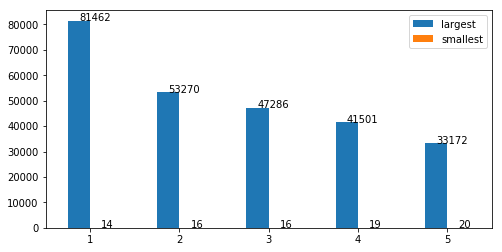

In [8]:
largest_qtys = [81462,53270,47286,41501,33172] 
smallest_qtys = [14,16,16,19,20]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

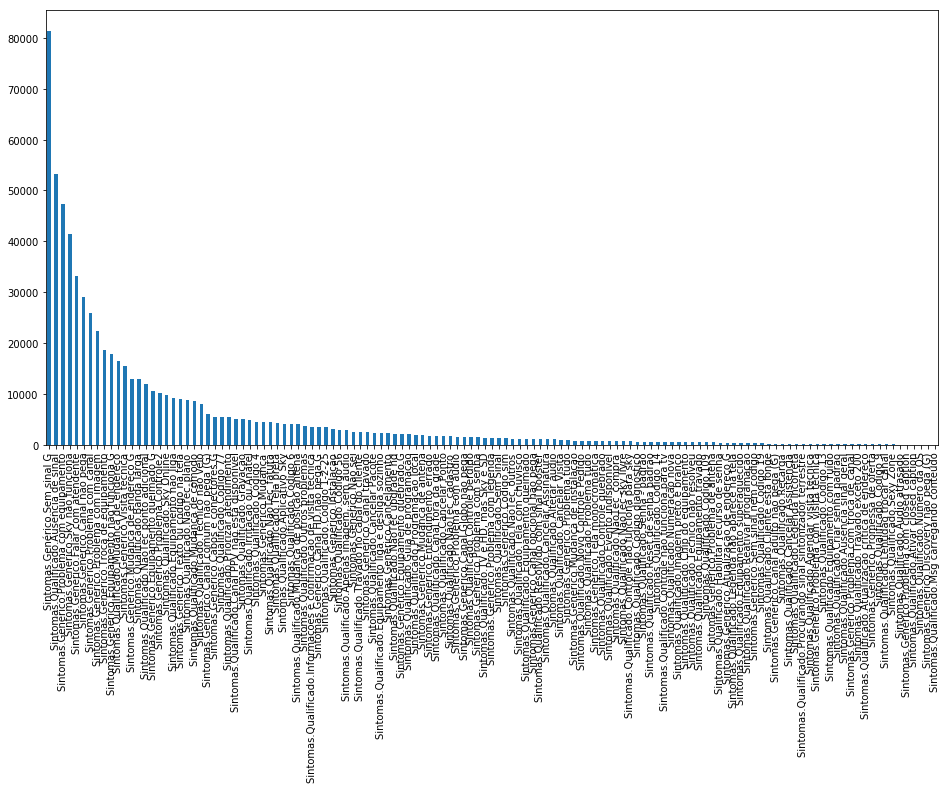

In [9]:
data.label.value_counts().plot.bar(figsize=(16,8))

### Splits dataset into train, test and validation sets

In [10]:
train_posts, test_posts, train_tags, test_tags = train_test_split(data['utterance'], data['label'],
                                                    stratify=data['label'], shuffle=True,
                                                    test_size=0.20)

train_posts, val_posts, train_tags, val_tags = train_test_split(train_posts, train_tags,
                                                    stratify=train_tags, shuffle=True,
                                                    test_size=0.10)



In [11]:
train_posts = train_posts.values.reshape(train_posts.shape[0], 1)
val_posts = val_posts.values.reshape(val_posts.shape[0], 1)
test_posts = test_posts.values.reshape(test_posts.shape[0], 1)

train_tags = train_tags.values.reshape(train_tags.shape[0], 1)
val_tags = val_tags.values.reshape(val_tags.shape[0], 1)
test_tags = test_tags.values.reshape(test_tags.shape[0], 1)

train_dataset = np.hstack([train_posts, train_tags])
val_dataset = np.hstack([val_posts, val_tags])
test_dataset = np.hstack([test_posts, test_tags])

In [12]:
print('train_posts shape: ' + str(train_posts.shape))
print('train_tags shape: ' + str(train_posts.shape))
print('val_posts shape: ' + str(val_posts.shape))
print('val_tags shape: ' + str(val_posts.shape))
print('test_posts shape: ' + str(test_posts.shape))
print('test_tags shape: ' + str(test_tags.shape))
print('train_dataset shape: ' + str(train_dataset.shape))
print('val_dataset shape: ' + str(val_dataset.shape))
print('test_dataset shape: ' + str(test_dataset.shape))

train_posts shape: (484761, 1)
train_tags shape: (484761, 1)
val_posts shape: (53863, 1)
val_tags shape: (53863, 1)
test_posts shape: (134656, 1)
test_tags shape: (134656, 1)
train_dataset shape: (484761, 2)
val_dataset shape: (53863, 2)
test_dataset shape: (134656, 2)


In [12]:
np.savetxt(TRAIN_DATASET, train_dataset,fmt="%s", delimiter=";")
np.savetxt(VAL_DATASET, val_dataset,fmt="%s", delimiter=";")
np.savetxt(TEST_DATASET, test_dataset,fmt="%s", delimiter=";")

###  Sentence size (token number) distribution

No handles with labels found to put in legend.


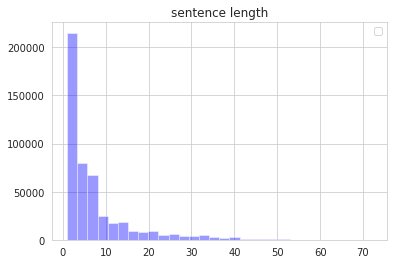

In [27]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0

sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
sentence_len = length_checker(train_posts) 
sns.distplot(sentence_len,bins= 30, hist=True, kde=False, color='b')
#plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('sentence length'); plt.legend()
plt.show()


In [28]:
print('max seq len ', sentence_len.max())
print('mean ', sentence_len.mean())
print('std dev ', sentence_len.std())

max seq len  72
mean  7.450093963829598
std dev  8.47088069024054
